In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
from matplotlib import pyplot as plt
from matplotlib_venn import venn2, venn2_circles
from matplotlib_venn import venn3, venn3_circles

#importing the datasets 

veganproducts = pd.read_csv('veganproducts.csv')
cleanskincare = pd.read_csv('cleanskincare.csv')
eyecream_lipcare = pd.read_csv('eyecream_lipcare.csv')
moist_cleans = pd.read_csv('moist_cleans.csv')
sun_treatments = pd.read_csv('sun_treatments.csv')
skincare_data = pd.concat([eyecream_lipcare,moist_cleans,sun_treatments],ignore_index=True)


In [2]:
#REMOVE duplicates
skincare_data = skincare_data.drop_duplicates(subset=None, keep='first', inplace=False)

In [3]:
#scrubbing price field
skincare_data['price_scrub'] = [float(i.replace('$','')) for i in skincare_data['price']]
#skincare_data

In [4]:
#defining new variables
veganproducts['is_vegan']= [1 if cat=='vegan-skin-care' else 0 for cat in veganproducts['category']]
cleanskincare['is_clean']=[1 if cat=='clean-skin-care' else 0 for cat in cleanskincare['category']]
#skincare_data['notvegan']= [1 if i==0 else 0 for i in skincare_data['is_vegan']]
#skincare_data['eye_care']= [1 if cat =='eye-treatment-dark-circle-treatment' else 0 for cat in skincare_data['category']]
#skincare_data['lip_care']= [1 if cat =='lip-treatments' else 0 for cat in skincare_data['category']]


In [5]:
#DEFINING RATING
skincare_data['rating'] = (skincare_data['num_five']*5 + \
                              skincare_data['num_four']*4 + \
                              skincare_data['num_three']*3 + \
                              skincare_data['num_two']*2 + \
                              skincare_data['num_one']*1) / (skincare_data['num_five'] + \
                                                 skincare_data['num_four'] +
                                                 skincare_data['num_three'] + 
                                                 skincare_data['num_two'] +
                                                 skincare_data['num_one'])

skincare_data['total_reviews'] = skincare_data['num_five'] + \
                              skincare_data['num_four'] + \
                              skincare_data['num_three'] + \
                              skincare_data['num_two'] + \
                              skincare_data['num_one'] 

In [6]:
skincare_data['num_love_scrub'] =[float(i.replace('K loves',''))*1000 if 'K' in i  \
                                  else float(i.replace(' loves',''))
                                for i in skincare_data['num_loves']]

In [7]:
#left join the flags 
skincare_data2=pd.merge(skincare_data,veganproducts[['prod_name','is_vegan']], on='prod_name', how='left')
skincare_data3=pd.merge(skincare_data2,cleanskincare[['prod_name','is_clean']],on='prod_name',how='left')
skincare_data = skincare_data3

In [8]:
#skincare_data

In [9]:
skincare_data['is_vegan']=skincare_data['is_vegan'].fillna(0)
skincare_data['is_clean']=skincare_data['is_clean'].fillna(0)

In [10]:
skincare_data['sum_vegan_clean'] = skincare_data['is_vegan'] +skincare_data['is_clean']


In [11]:
skincare_data['sum_vegan_clean'] = skincare_data['is_vegan'] +skincare_data['is_clean']
skincare_data['vegan_and_clean'] = [1 if i==2 else 0 for i in skincare_data['sum_vegan_clean']]
skincare_data['vegan_only'] = np.where(skincare_data.is_vegan==1, \
                                      np.where(skincare_data.vegan_and_clean!=1,1,0),0)
skincare_data['clean_only'] = np.where(skincare_data.is_clean==1, \
                                      np.where(skincare_data.vegan_and_clean!=1,1,0),0)
skincare_data['all_other'] = np.where(skincare_data.is_vegan==0, \
                                      np.where(skincare_data.is_clean==0,1,0),0)



In [12]:
skincare_data_1 = skincare_data[skincare_data['vegan_and_clean']==1]
skincare_data_2 =  skincare_data[skincare_data['vegan_only']==1]
skincare_data_3 = skincare_data[skincare_data['clean_only']==1]
skincare_data_4 = skincare_data[skincare_data['all_other']==1]

skincare_data_1['product_type'] = 'Vegan and Clean' 
skincare_data_2['product_type'] = 'Vegan'
skincare_data_3['product_type'] = 'Clean'
skincare_data_4['product_type'] = 'Other'

skincare_data = pd.concat([skincare_data_1, skincare_data_2,skincare_data_3, skincare_data_4], axis=0)

/Users/jessiewang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/jessiewang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/jessiewang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See 

In [13]:
skincare_datasub = skincare_data[['category','vegan_only','clean_only','vegan_and_clean','all_other']]
skincare_datasub=skincare_datasub.groupby('category').agg(sum)

compare_cat= skincare_datasub

In [14]:
#compare_cat=compare_cat.reset_index()
#del compare_cat['index']
#compare_cat

compare_cat = compare_cat.sort_values('all_other')
compare_cat

,vegan_only,clean_only,vegan_and_clean,all_other
category,,,,
cleanser,9,28,34,116
sunscreen-sun-protection,16,21,36,116
lip-treatments,5,30,12,129
eye-treatment-dark-circle-treatment,16,28,30,147
facial-treatments,97,71,86,336
moisturizing-cream-oils-mists,76,114,162,476


In [15]:
skincare_data['count']=1
skincare_datasub = skincare_data[['category','product_type','count']]
skincare_datasub=skincare_datasub.groupby(['category','product_type']).agg(sum)
compare_cat= skincare_datasub

In [16]:
compare_cat = compare_cat.reset_index()

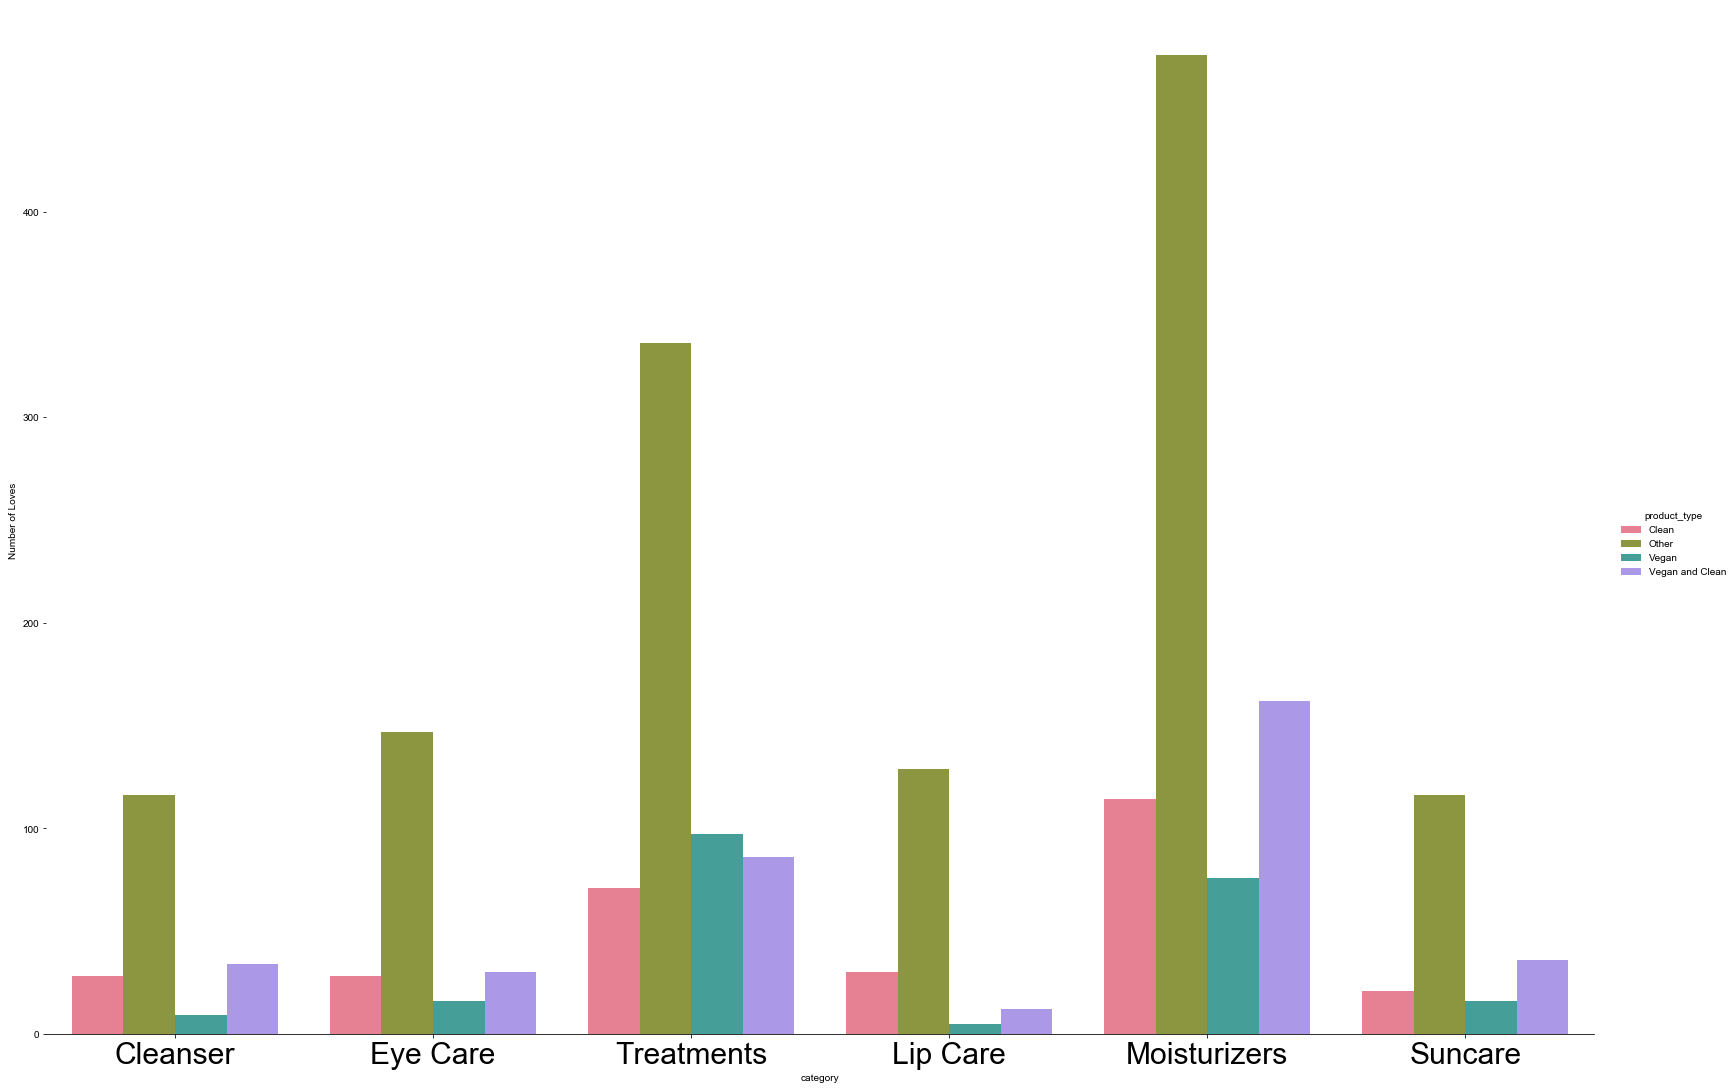

In [17]:
import seaborn as sns
# Draw a nested barplot to show survival for class and sex
g = sns.catplot(x="category", y="count", hue="product_type", height=15, aspect=1.5, \
                data=compare_cat, kind="bar", palette='husl')

sns.set(font_scale=3) 
sns.set_style(style="white")

g.despine(left=True)
g.set_ylabels("Number of Loves")

labels = ['Cleanser', 'Eye Care', 'Treatments', 'Lip Care','Moisturizers','Suncare']


g.set_xticklabels(labels, fontsize=30)

In [18]:
#PRICE ANALYSIS

#skincare_data.groupby('category').agg(sum)


In [19]:
skincare_data['o_price']= skincare_data['price_scrub']*skincare_data['all_other']
skincare_data['v_price']= skincare_data['price_scrub']*skincare_data['vegan_only']
skincare_data['c_price']= skincare_data['price_scrub']*skincare_data['clean_only']
skincare_data['voc_price']= skincare_data['price_scrub']*skincare_data['vegan_and_clean']

skincare_data['clean_prices'] = skincare_data['c_price'] + skincare_data['voc_price']
skincare_data['not_clean_prices'] = skincare_data['o_price'] + skincare_data['v_price']
skincare_data['vegan_prices'] = skincare_data['v_price'] + skincare_data['voc_price']
skincare_data['not_vegan_prices'] = skincare_data['o_price'] + skincare_data['c_price']


[Text(0, 0, 'Eyes'),
 Text(0, 0, 'Lips'),
 Text(0, 0, 'Moisturizer'),
 Text(0, 0, 'Cleanser'),
 Text(0, 0, 'Suncare'),
 Text(0, 0, 'Treatments')]

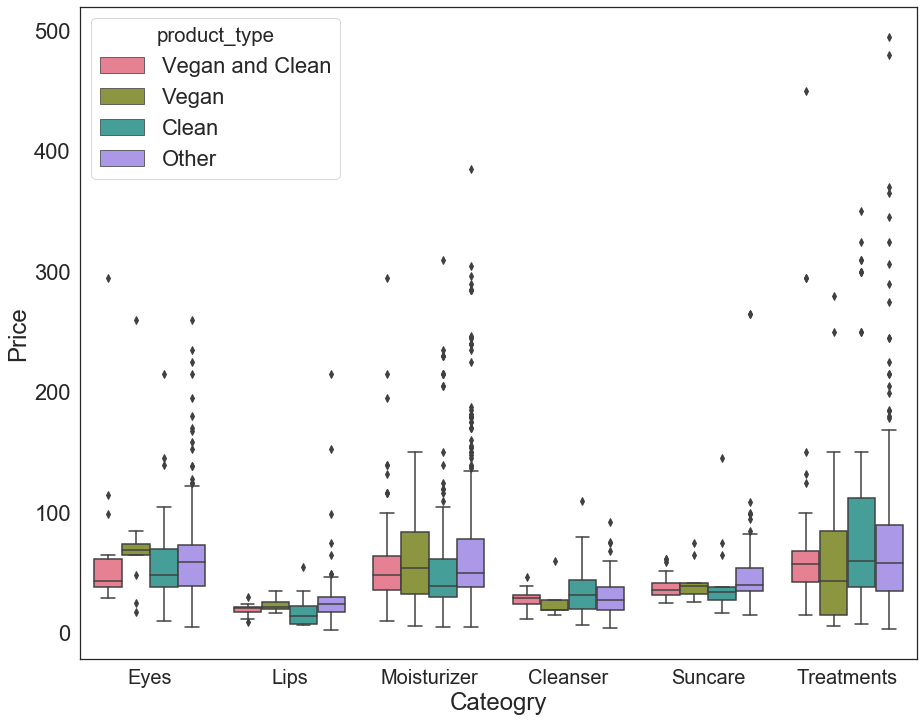

In [20]:
#Analyzing Price by Grouped BoxPlot
import seaborn as sns
plt.figure(figsize=(15,12))
sns.set(font_scale=2) 
sns.set_style(style="white")
# Grouped boxplot
ax=sns.boxplot(x="category", y="price_scrub", hue="product_type", \
            data=skincare_data, palette='husl')
labels = ['Eyes','Lips', 'Moisturizer','Cleanser','Suncare','Treatments']

ax.set(xlabel= "Cateogry", ylabel="Price")
ax.set_xticklabels(labels, fontsize=20)



In [21]:
len(skincare_data['skintype'])!

SyntaxError: invalid syntax (<ipython-input-21-cfaa391038e9>, line 1)

In [ ]:
#looking at brands that carry clean and non-clean products
#and how those product price differences on average 
skincare_data['clean_prices'] = skincare_data['c_price'] + skincare_data['voc_price']
skincare_data['not_clean_prices'] = skincare_data['o_price'] + skincare_data['v_price']

sub_skindata = skincare_data[['category','brand', \
                             'clean_prices','not_clean_prices']]

brand_analysis = sub_skindata.groupby(['brand','category'])\
[['clean_prices','not_clean_prices']].mean().reset_index()

test=brand_analysis[brand_analysis['not_clean_prices']!=0]

test=test[test['clean_prices']!=0]

test['diff']=test['clean_prices'] - test['not_clean_prices'] 

In [22]:
#Analyzing Price by Grouped BoxPlot
import seaborn as sns
plt.figure(figsize=(15,12))
sns.set(font_scale=2) 
sns.set_style(style="white")
# Grouped boxplot
ax=sns.boxplot(x="category", y="diff", data=test)
#labels = ['Eyes','Lips', 'Moisturizer','Treatments','Suncare','Cleanser']

ax.set(xlabel= "Cateogry", ylabel="Price")
ax.set_xticklabels(labels,fontsize=20)

plt.axhline(0, color='red')


NameError: name 'test' is not defined

<Figure size 1080x864 with 0 Axes>

In [23]:
#looking at how much brands that carry both vegan and non-vegan products
#are charging between the two categories


sub_skindata = skincare_data[['category','brand', \
                             'vegan_prices','not_vegan_prices']]

brand_analysis = sub_skindata.groupby(['brand','category'])\
[['vegan_prices','not_vegan_prices']].mean().reset_index()

test=brand_analysis[brand_analysis['not_vegan_prices']!=0]

test=test[test['vegan_prices']!=0]

test['diff']=test['vegan_prices'] - test['not_vegan_prices'] 

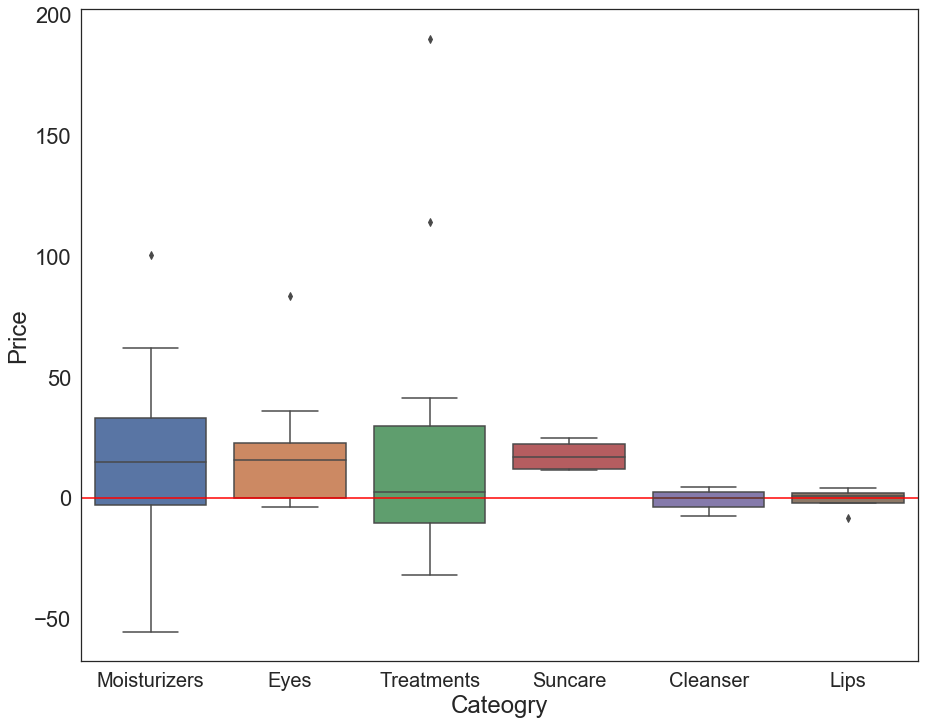

In [24]:
#Analyzing Price by Grouped BoxPlot
import seaborn as sns
plt.figure(figsize=(15,12))
sns.set(font_scale=2) 
sns.set_style(style="white")
# Grouped boxplot
ax=sns.boxplot(x="category", y="diff", data=test)
labels = ['Moisturizers','Eyes', 'Treatments','Suncare','Cleanser','Lips']

ax.set(xlabel= "Cateogry", ylabel="Price")
ax.set_xticklabels(labels, fontsize=20)

plt.axhline(0, color='red')



In [25]:
#compare number of loves by category

In [26]:
test=skincare_data[['category','product_type','num_love_scrub']]
test=test.groupby(['category','product_type']).agg(sum).reset_index()

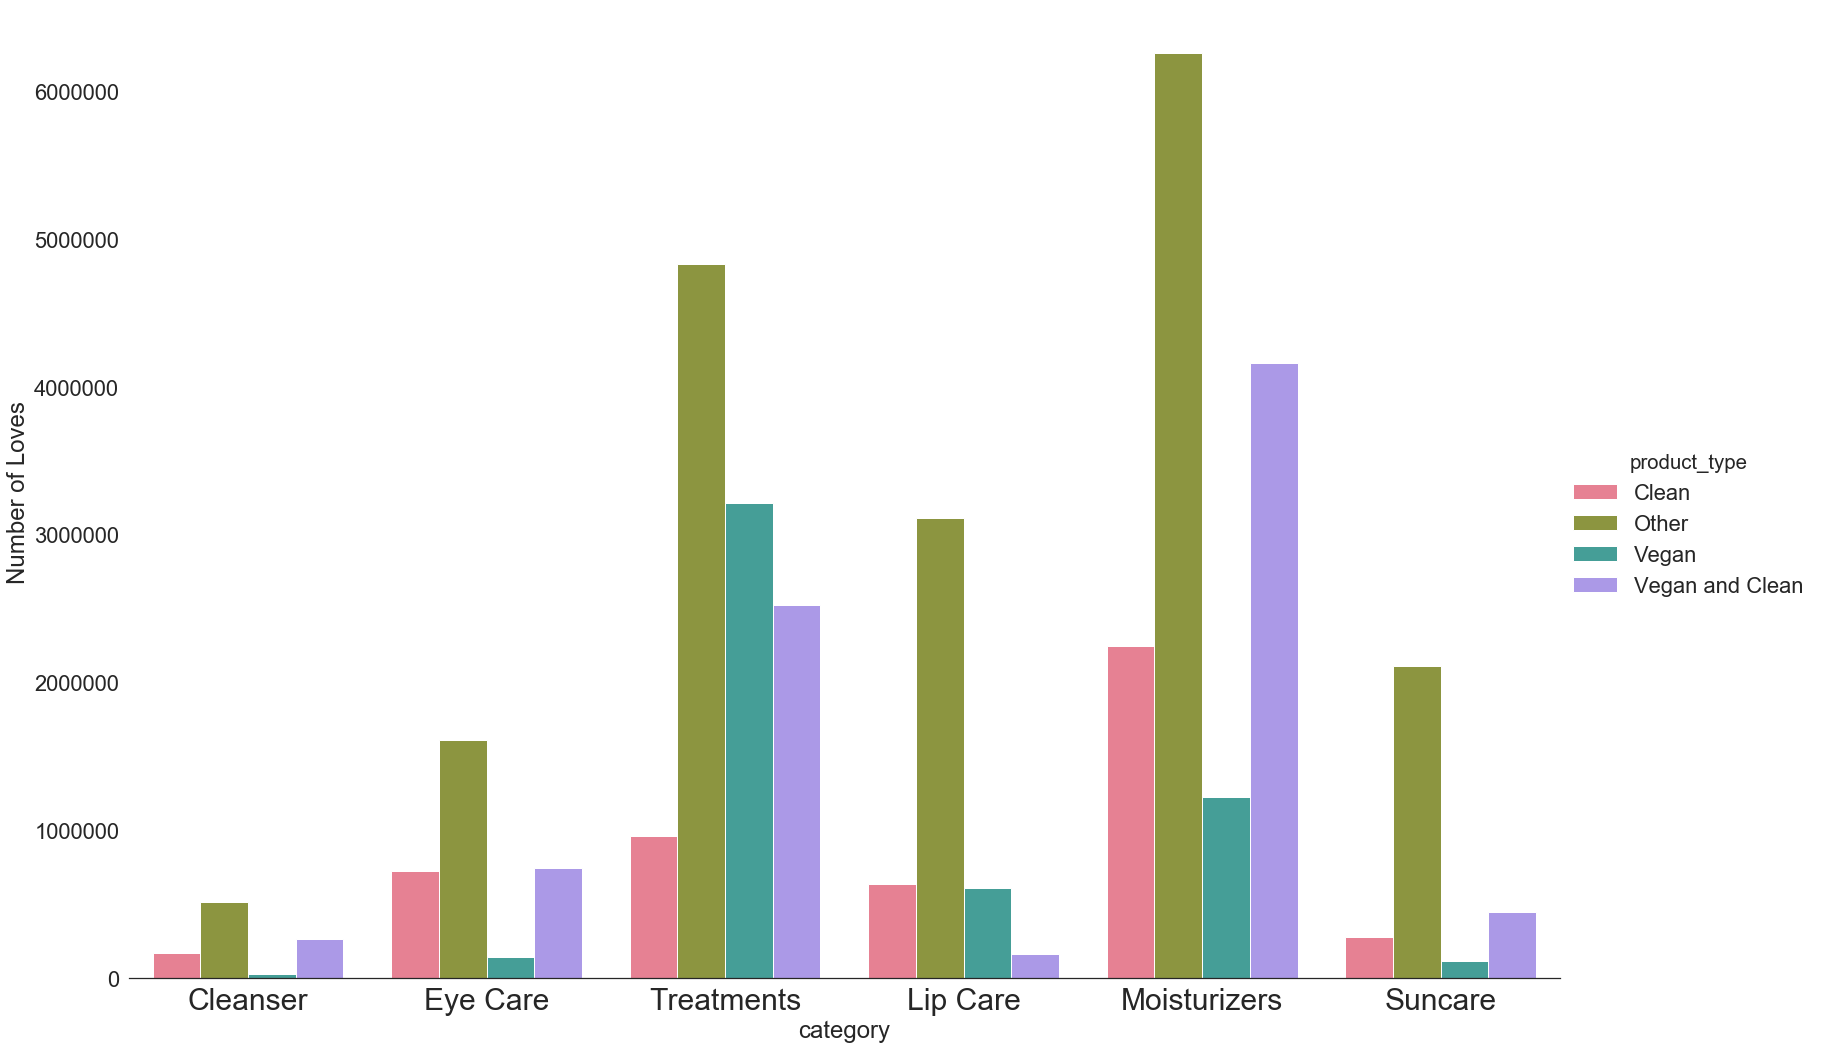

In [27]:
# Draw a nested barplot to show survival for class and sex
g = sns.catplot(x="category", y="num_love_scrub", hue="product_type", height=15, aspect=1.5, \
                data=test, kind="bar", palette='husl')

sns.set(font_scale=3) 
sns.set_style(style="white")

g.despine(left=True)
g.set_ylabels("Number of Loves")

labels = ['Cleanser', 'Eye Care', 'Treatments', 'Lip Care','Moisturizers','Suncare']


g.set_xticklabels(labels, fontsize=30)



In [28]:
# compare correlations

In [29]:
skincare_data_use = skincare_data[skincare_data['product_type']!="Other"]

[Text(0, 0.5, 'Total Reviews'), Text(0.5, 0, 'Number of Loves')]

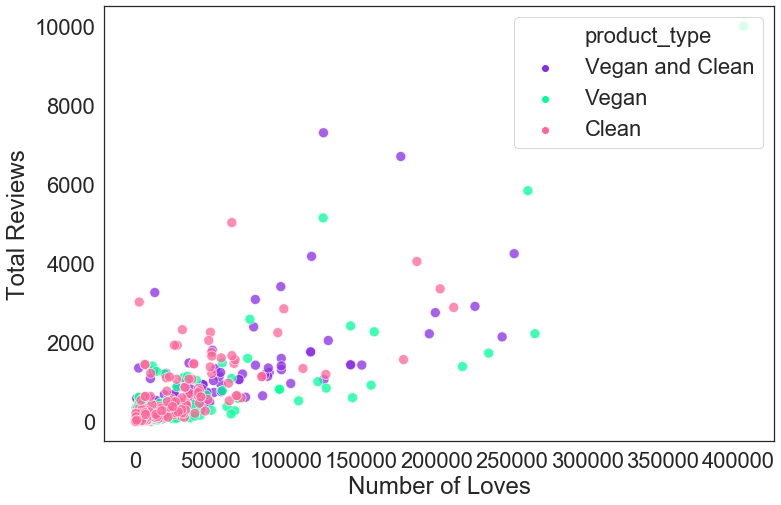

In [37]:
#Scatter Plot # of Loves vs Rating - color represents product type
plt.figure(figsize=(12,8))
sns.set(font_scale=2) 
sns.set_style(style="white")
g = sns.scatterplot(x=skincare_data_use['num_love_scrub'], y=skincare_data_use['total_reviews'], \
                    hue="product_type", data=skincare_data_use, s=100, alpha = 0.75, \
                    palette=['#8A2BE2','#00ff99','#ff6699'], legend='full')

g.set(xlabel= "Number of Loves", ylabel="Total Reviews")



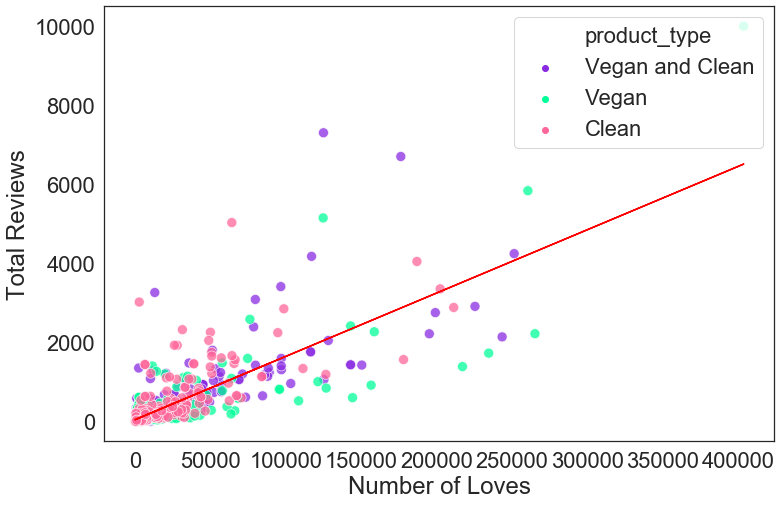

In [65]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 

from scipy import stats
#Scatter Plot # of Loves vs Rating - color represents product type
plt.figure(figsize=(12,8))
sns.set(font_scale=2) 
sns.set_style(style="white")
g = sns.scatterplot(x=skincare_data_use['num_love_scrub'], y=skincare_data_use['total_reviews'], \
                    hue="product_type", data=skincare_data_use, s=100, alpha = 0.75, \
                    palette=['#8A2BE2','#00ff99','#ff6699'], legend='full')

g.set(xlabel= "Number of Loves", ylabel="Total Reviews")


X=skincare_data_use[['num_love_scrub']]
Y=skincare_data_use[['total_reviews']]
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X) 
plt.plot(X, Y_pred, color='red')
plt.show()


In [66]:

X = skincare_data_use[['num_love_scrub']]
y = skincare_data_use[['total_reviews']]
X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model

# Note the difference in argument order
model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)

# Print out the statistics
model.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          total_reviews   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.611
Method:                 Least Squares   F-statistic:                     1369.
Date:                Sat, 16 May 2020   Prob (F-statistic):          1.07e-180
Time:                        17:08:47   Log-Likelihood:                -6629.6
No. Observations:                 871   AIC:                         1.326e+04
Df Residuals:                     869   BIC:                         1.327e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             44.8590     19.018      2.359      0.019       7.532      82.186
num_love_scrub     0.0160      0.000     37.000      0.000       0.015       0.017
==============================================================================
Omnibus:                      792.290   Durbin-Watson:                   1.883
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            43943.998
Skew:                           3.901   Prob(JB):                         0.00
Kurtosis:                      36.911   Cond. No.                     5.03e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.03e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

[Text(0, 0.5, 'Rating'), Text(0.5, 0, 'Price')]

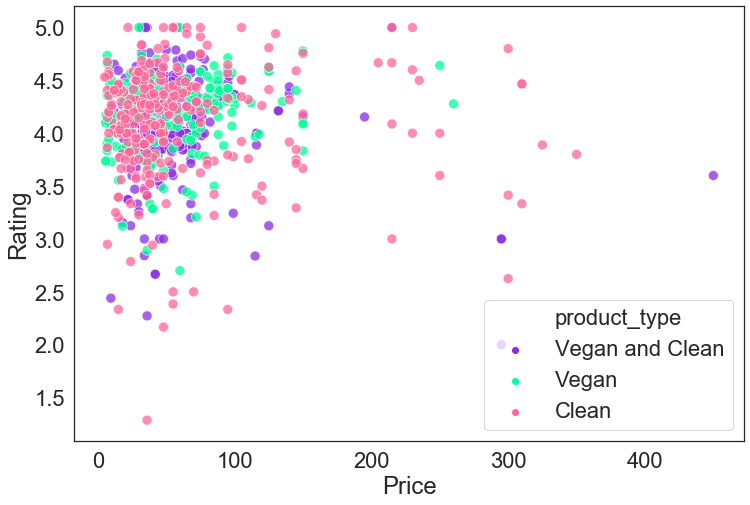

In [67]:
#Scatter Plot # of Loves vs Rating - color represents product type
plt.figure(figsize=(12,8))
sns.set(font_scale=2) 
sns.set_style(style="white")
g = sns.scatterplot(x=skincare_data_use['price_scrub'], y=skincare_data_use['rating'], hue="product_type", 
              data=skincare_data_use, s=100, alpha = 0.75,
                    palette=['#8A2BE2','#00ff99','#ff6699'], legend='full')

g.set(xlabel= "Price", ylabel="Rating")



<BarContainer object of 4 artists>

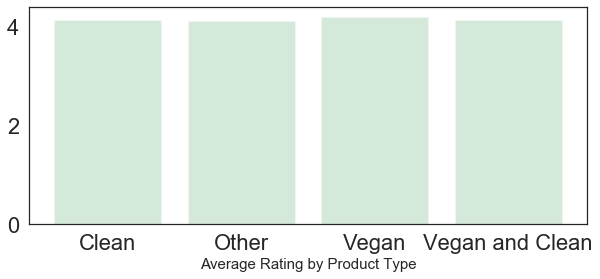

In [80]:
#Average Rating for all products separated by product type
skincare_datasub = skincare_data[['product_type','rating']]
compare_ratings=skincare_datasub.groupby(['product_type']).mean()
compare_ratings=compare_ratings.reset_index()

plt.figure(figsize=(10,4))
plt.xlabel('Average Rating by Product Type', size=15)
plt.bar(compare_ratings['product_type'],compare_ratings['rating'], alpha = 0.25,color='g')

In [22]:
#Comparing Clean Ingredients vs Non-Clean Products

In [214]:
#skincare_data_fil = skincare_data[skincare_data['category']=='moisturizing-cream-oils-mists']
skincare_data_fil = skincare_data[skincare_data['category']=='facial-treatments']

In [215]:
cleanproducts_base = skincare_data_fil[skincare_data_fil['product_type']=='Clean']
vegan_cleanproducts_base = skincare_data_fil[skincare_data_fil['product_type']=='Vegan and Clean']
otherproducts = skincare_data_fil[skincare_data_fil['product_type']=='Other']

In [216]:
cleanproducts = pd.concat([cleanproducts_base,vegan_cleanproducts_base],ignore_index=True)

In [217]:
blank_c =[]
for i in cleanproducts['ingredients']:
     blank_c.append(i.split(', '))


blank_o =[]
for i in otherproducts['ingredients']:
     blank_o.append(i.split(', '))


In [218]:
flat_ingredients_c = [a for sublist in blank_c for a in sublist]
flat_ingredients_o = [a for sublist in blank_o for a in sublist]

In [219]:
dict_clean = dict((ingredient, flat_ingredients_c.count(ingredient)) for ingredient in flat_ingredients_c)
dict_other = dict((ingredient, flat_ingredients_o.count(ingredient)) for ingredient in flat_ingredients_o)

In [220]:
#top20 vegan ingredients - show venn diagram 
top50_clean = sorted(dict_clean, key=dict_clean.get)[-50:] 
top50_other = sorted(dict_other, key=dict_other.get)[-50:]


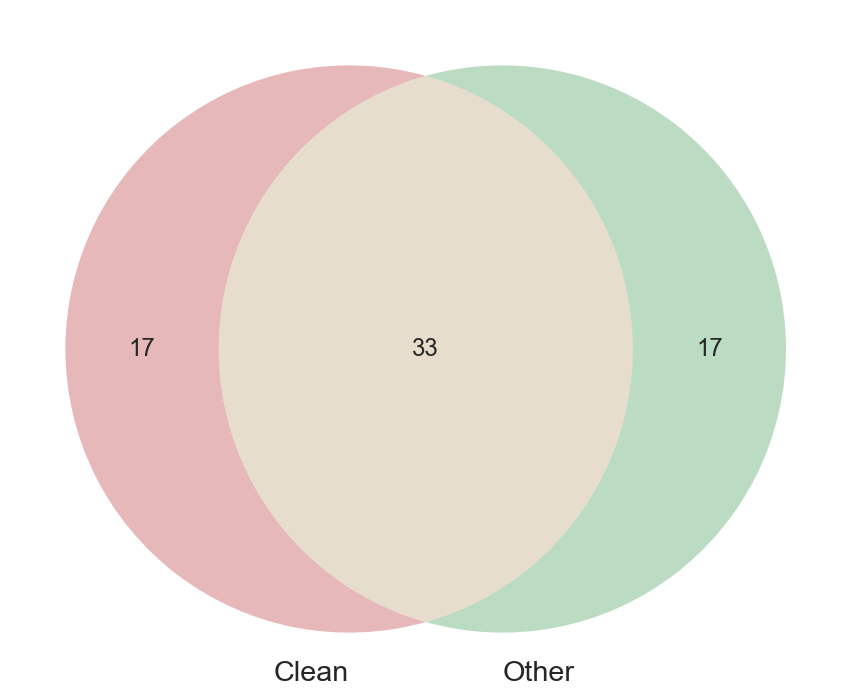

In [221]:
from matplotlib_venn import venn2, venn2_circles
from matplotlib import pyplot as plt
plt.figure(figsize=(15,15))

labels = ['Clean', 'Other']

venn2([set(top50_clean),set(top50_other)],set_labels = labels)

In [ ]:
g = sns.catplot(x="category", y="percent_1", hue="product_type", height=15, aspect=1.5, \
                data=compare_rating, kind="bar", palette='husl')

sns.set(font_scale=3) 
sns.set_style(style="white")

g.despine(left=True)
g.set_ylabels("Number of Loves")

labels = ['Cleanser', 'Eye Care', 'Treatments', 'Lip Care','Moisturizers','Suncare']


g.set_xticklabels(labels, fontsize=30)